In [15]:
import MapGrabber as MG
import glob
import numpy as np
import cv2
from scipy.ndimage import imread
from matplotlib import pyplot as plt
%matplotlib inline

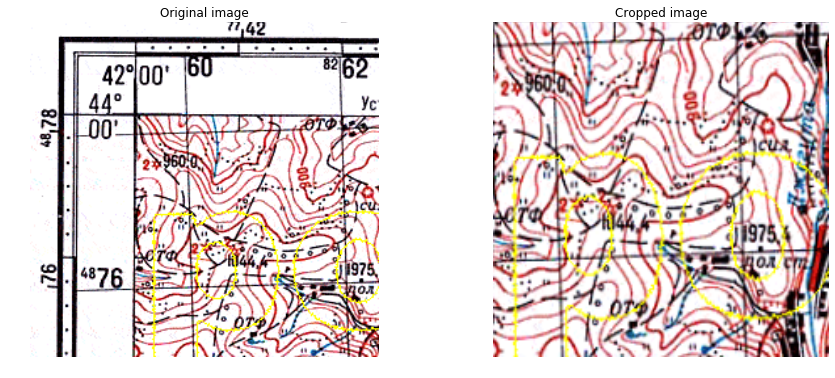

In [16]:
img_fps = glob.glob('.\\k38_lom_imgs\\*.gif')
img = imread(img_fps[0])
cimg = MG.crop_border(img)
f, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(img[:256, :266]); axs[0].set_title('Original image'); axs[0].axis('off');
axs[1].imshow(cimg[:200, :200]); axs[1].set_title('Cropped image'); axs[1].axis('off');

In [31]:
dst_fps = []
for fp in img_fps:
    #img = imread(fp)
    #dst_img = cv2.cvtColor(MG.crop_border(img), cv2.COLOR_BGR2RGB)
    dst_fps.append('./k38_lom_cropped/' + fp.split('\\')[-1][:-4] + '.png')
    #cv2.imwrite(dst_fps[-1], dst_img)

In [68]:
agg_img = cv2.imread(dst_fps[0])

for fp in dst_fps[1:5]:
    app_img = cv2.imread(fp)
    height = max(agg_img.shape[0], app_img.shape[0])
    app_img = cv2.resize(app_img, (app_img.shape[1], height))
    agg_img = cv2.resize(agg_img, (agg_img.shape[1], height))
    agg_img = np.hstack([agg_img, app_img])

In [69]:
cv2.imwrite('sample_result_3.png', agg_img)

True